# Project 2

## State Drug Utilization

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10
import numpy as np
from datetime import datetime
import re

## Installing missingno Library 

In [2]:
!pip install missingno

### Loading Dataset

In [64]:
df=pd.read_csv("State_Drug_Utilization_Data_2010.csv",dtype=None)

C:\Users\shail\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Exploring Dataset

In [65]:
df.shape

(3124389, 20)

In [5]:
df.dtypes

Utilization Type                   object
State                              object
Labeler Code                        int64
Product Code                        int64
Package Size                       object
Year                                int64
Quarter                             int64
Product Name                       object
Units Reimbursed                  float64
Suppression Used                     bool
Number of Prescriptions           float64
Total Amount Reimbursed           float64
Medicaid Amount Reimbursed        float64
Non Medicaid Amount Reimbursed    float64
Quarter Begin                      object
Quarter Begin Date                 object
Latitude                          float64
Longitude                         float64
Location                           object
NDC                                object
dtype: object

In [6]:
df.isna().sum()

Utilization Type                        0
State                                   0
Labeler Code                            0
Product Code                            0
Package Size                           24
Year                                    0
Quarter                                 0
Product Name                          729
Units Reimbursed                  1587330
Suppression Used                        0
Number of Prescriptions           1587330
Total Amount Reimbursed           1587330
Medicaid Amount Reimbursed        1587330
Non Medicaid Amount Reimbursed    1587330
Quarter Begin                           0
Quarter Begin Date                      0
Latitude                           218763
Longitude                          218763
Location                           218763
NDC                                     0
dtype: int64

In [7]:
df.head()

,Utilization Type,State,Labeler Code,Product Code,Package Size,Year,Quarter,Product Name,Units Reimbursed,Suppression Used,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed,Quarter Begin,Quarter Begin Date,Latitude,Longitude,Location,NDC
0,FFSU,IN,62756,139,2,2010,1,GABAPENTIN,NaN,True,NaN,NaN,NaN,NaN,1/1,01/01/2010,40.3363,-89.0022,"(40.3363, -89.0022)",62756013902
1,FFSU,CA,51991,292,1,2010,3,OXCARBAZEP,13997.0,False,172.0,13623.86,13289.34,334.52,7/1,07/01/2010,33.7712,-111.3877,"(33.7712, -111.3877)",51991029201
2,FFSU,XX,338,629,4,2010,4,TRAVASOL 1,164627000.0,False,29.0,27541.10,27541.10,0.00,10/1,10/01/2010,NaN,NaN,NaN,338062904
3,FFSU,TX,24208,580,64,2010,1,GENTAMICIN,4575.0,False,301.0,3480.94,3469.06,11.88,1/1,01/01/2010,33.8191,-80.9066,"(33.8191, -80.9066)",24208058064
4,MCOU,MN,88,1107,55,2010,2,ALLEGRA,NaN,True,NaN,NaN,NaN,NaN,4/1,04/01/2010,43.3504,-84.5603,"(43.3504, -84.5603)",88110755


In [8]:
df.tail()

,Utilization Type,State,Labeler Code,Product Code,Package Size,Year,Quarter,Product Name,Units Reimbursed,Suppression Used,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed,Quarter Begin,Quarter Begin Date,Latitude,Longitude,Location,NDC
3124384,FFSU,AZ,60505,168,9,2010,2,PRAVASTATI,NaN,True,NaN,NaN,NaN,NaN,4/1,04/01/2010,14.2417,-170.7197,"(14.2417, -170.7197)",60505016809
3124385,MCOU,SC,185,771,1,2010,3,BISOPROLOL,NaN,True,NaN,NaN,NaN,NaN,7/1,07/01/2010,40.5773,-77.2640,"(40.5773, -77.264)",185077101
3124386,FFSU,IA,173,682,24,2010,2,VENTOLIN H,NaN,True,NaN,NaN,NaN,NaN,4/1,04/01/2010,21.1098,-157.5311,"(21.1098, -157.5311)",173068224
3124387,FFSU,WY,63323,103,65,2010,2,CISPLATIN,NaN,True,NaN,NaN,NaN,NaN,4/1,04/01/2010,44.0407,-72.7093,"(44.0407, -72.7093)",63323010365
3124388,FFSU,OH,64125,915,10,2010,2,PHENOBARBI,NaN,True,NaN,NaN,NaN,NaN,4/1,04/01/2010,38.4199,-117.1219,"(38.4199, -117.1219)",64125091510


In [9]:
import missingno as msno

## Plot of missing values in each column

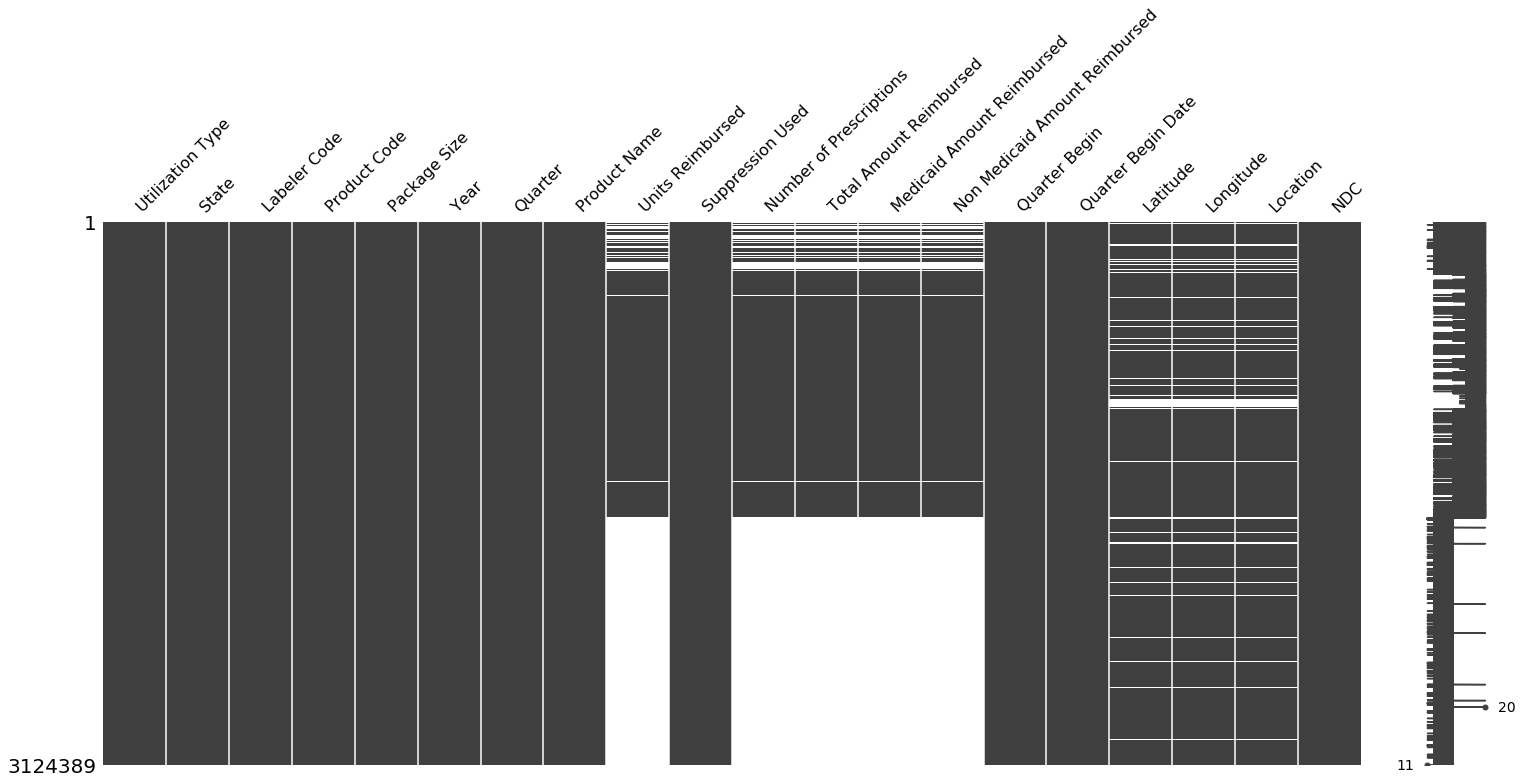

In [10]:
msno.matrix(df)

In [11]:
df.shape[0]

3124389

In [12]:
df.columns

Index(['Utilization Type', 'State', 'Labeler Code', 'Product Code',
       'Package Size', 'Year', 'Quarter', 'Product Name', 'Units Reimbursed',
       'Suppression Used', 'Number of Prescriptions',
       'Total Amount Reimbursed', 'Medicaid Amount Reimbursed',
       'Non Medicaid Amount Reimbursed', 'Quarter Begin', 'Quarter Begin Date',
       'Latitude', 'Longitude', 'Location', 'NDC'],
      dtype='object')

In [13]:
df["Latitude"].isna().sum()

218763

## Lag Plot to see if data is regular distrubuted

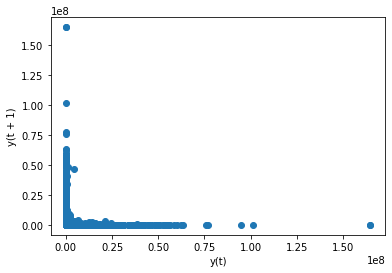

In [67]:
pd.plotting.lag_plot(df["Units Reimbursed"])

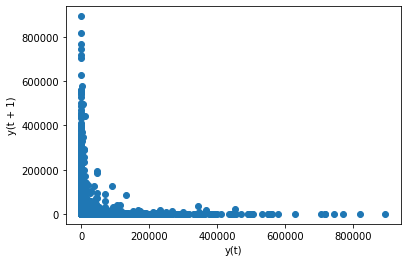

In [68]:
pd.plotting.lag_plot(df["Number of Prescriptions"])

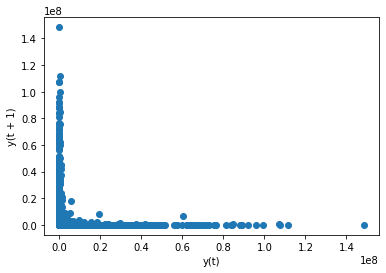

In [69]:
pd.plotting.lag_plot(df["Total Amount Reimbursed"])

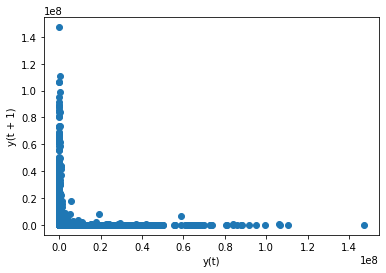

In [70]:
pd.plotting.lag_plot(df["Medicaid Amount Reimbursed"])

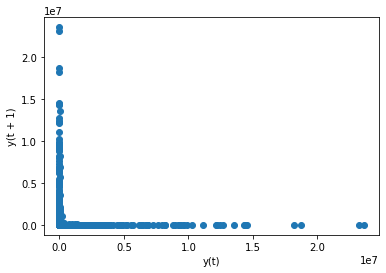

In [71]:
pd.plotting.lag_plot(df["Non Medicaid Amount Reimbursed"])

## Dorping NULL Values in each column

In [14]:
df=df.dropna(subset=['Units Reimbursed', 'Number of Prescriptions','Total Amount Reimbursed','Medicaid Amount Reimbursed','Non Medicaid Amount Reimbursed'])

## Using missingno plot after removing NULL values

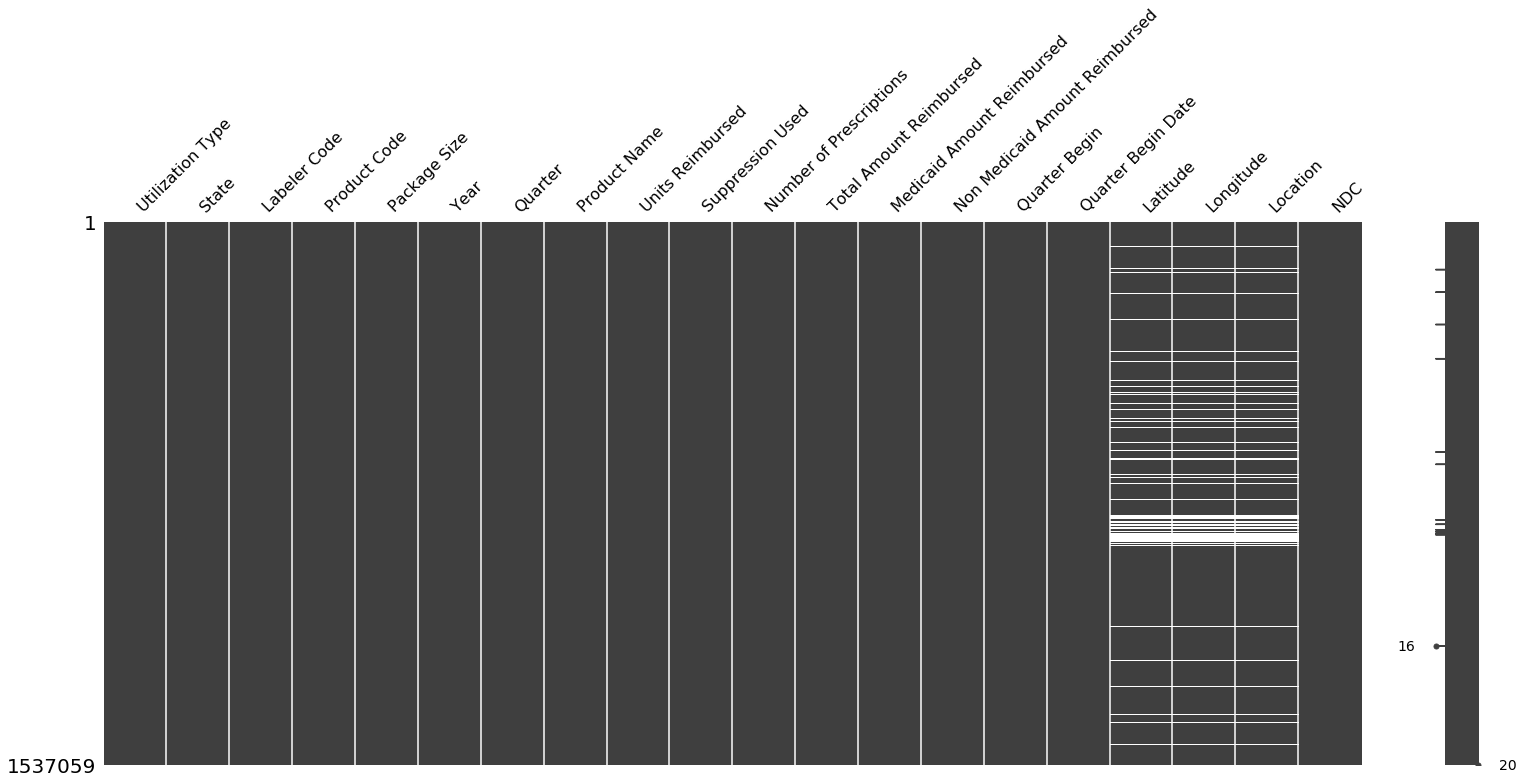

In [15]:
msno.matrix(df)

In [16]:
df.shape

(1537059, 20)

In [17]:
df=df.drop(["Latitude","Longitude","Location","NDC"],axis=1)

In [18]:
df.shape

(1537059, 16)

In [19]:
df.State.unique()

array(['CA', 'XX', 'TX', 'KY', 'NC', 'TN', 'IN', 'KS', 'CT', 'NV', 'CO',
       'ME', 'UT', 'DC', 'AL', 'LA', 'NY', 'PA', 'MA', 'NJ', 'OK', 'WI',
       'NE', 'SC', 'GA', 'MD', 'NH', 'OH', 'FL', 'MN', 'AR', 'MT', 'NM',
       'OR', 'SD', 'MI', 'WA', 'IL', 'VA', 'MO', 'AZ', 'MS', 'IA', 'DE',
       'WV', 'WY', 'RI', 'AK', 'ND', 'ID', 'VT', 'HI'], dtype=object)

In [20]:
data = [line.strip() for line in open("USA_States.txt", 'r')]

In [21]:

text_list=[]
for text in data:
    modified_string = re.sub(r'[^a-zA-Z0-9_\s]+', '', text)
    text_list.append(modified_string)

In [23]:
text_list[1][4:]

'Alaska'

In [24]:
df.head()

,Utilization Type,State,Labeler Code,Product Code,Package Size,Year,Quarter,Product Name,Units Reimbursed,Suppression Used,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed,Quarter Begin,Quarter Begin Date
1,FFSU,CA,51991,292,1,2010,3,OXCARBAZEP,13997.0,False,172.0,13623.86,13289.34,334.52,7/1,07/01/2010
2,FFSU,XX,338,629,4,2010,4,TRAVASOL 1,164627000.0,False,29.0,27541.10,27541.10,0.00,10/1,10/01/2010
3,FFSU,TX,24208,580,64,2010,1,GENTAMICIN,4575.0,False,301.0,3480.94,3469.06,11.88,1/1,01/01/2010
5,FFSU,KY,78,375,63,2010,3,ELIDEL,50830.0,False,498.0,132849.19,129425.48,3423.71,7/1,07/01/2010
6,FFSU,XX,39822,205,1,2010,2,PANCRELIPA,146005.0,False,803.0,62947.39,61645.54,1301.85,4/1,04/01/2010


In [63]:
df["Suppression Used"].nunique()

1

In [ ]:
df["Year"].nunique()

In [26]:
df["Product Name"].nunique()

11130

## Removing Un-Identified state from dataset

In [27]:
indexNames = df[ df['State'] == 'XX' ].index
df.drop(indexNames,inplace=True)

In [28]:
df.head()

,Utilization Type,State,Labeler Code,Product Code,Package Size,Year,Quarter,Product Name,Units Reimbursed,Suppression Used,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed,Quarter Begin,Quarter Begin Date
1,FFSU,CA,51991,292,1,2010,3,OXCARBAZEP,13997.0,False,172.0,13623.86,13289.34,334.52,7/1,07/01/2010
3,FFSU,TX,24208,580,64,2010,1,GENTAMICIN,4575.0,False,301.0,3480.94,3469.06,11.88,1/1,01/01/2010
5,FFSU,KY,78,375,63,2010,3,ELIDEL,50830.0,False,498.0,132849.19,129425.48,3423.71,7/1,07/01/2010
7,FFSU,NC,31722,520,10,2010,2,HYDRALAZIN,2991.0,False,26.0,528.15,468.15,60.00,4/1,04/01/2010
9,FFSU,TN,185,774,30,2010,2,BISOPROLOL,1575.0,False,44.0,1274.70,1274.70,0.00,4/1,04/01/2010


## Grouping Units Reimbursed with states

In [29]:
df2=df.groupby(["State"])["Units Reimbursed"].sum()

In [30]:
df2.head()

State
AK    4.497251e+07
AL    4.742262e+08
AR    2.876800e+08
AZ    5.998881e+08
CA    3.274306e+09
Name: Units Reimbursed, dtype: float64

## Plot for states and Units Reimbursed

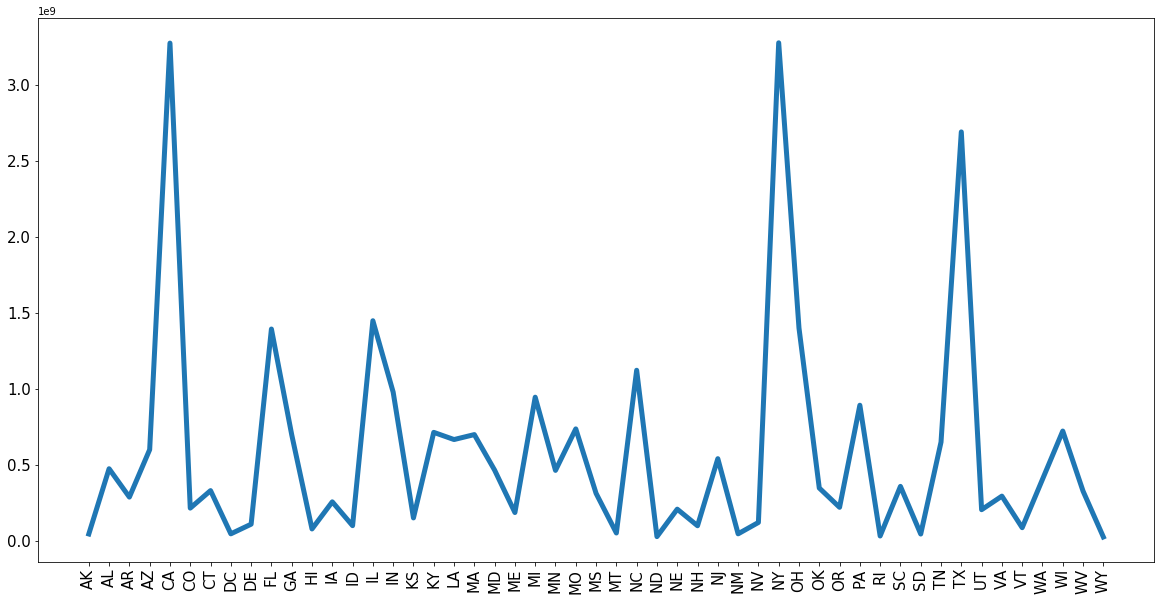

In [43]:
plt.figure(figsize=(20,10))
plt.plot(df2,linewidth=5)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.show()

## Grouping State and Total Amount Reimbursed 

In [44]:
df3=df.groupby(["State"])["Total Amount Reimbursed"].sum()

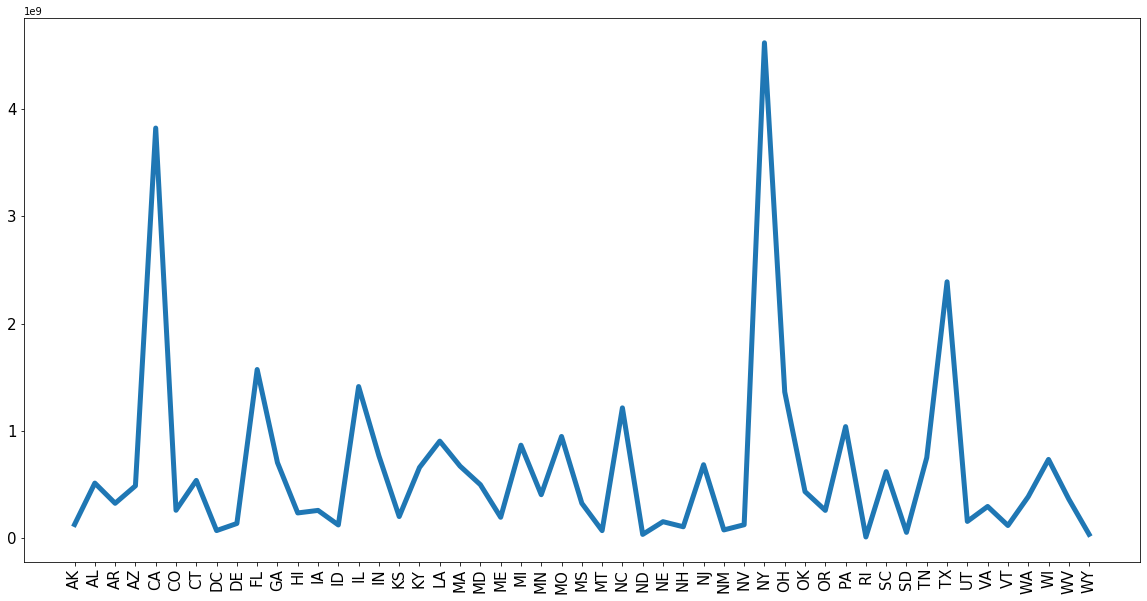

In [45]:
plt.figure(figsize=(20,10))
plt.plot(df3,linewidth=5)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.show()